<a href="https://colab.research.google.com/github/aman-makode-11/DeepLearningLab/blob/main/Practical5_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install dependencies
!pip install tensorflow scikit-learn matplotlib pandas

In [1]:
# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("process_data.csv")
df.head()

,Gene,Sample,FPKM,description,tissue,metastasis
0,TSPAN6,CA.102548,0.93,CA.102548,breast tumor,yes
1,TNMD,CA.102548,0.00,CA.102548,breast tumor,yes
2,DPM1,CA.102548,0.00,CA.102548,breast tumor,yes
3,SCYL3,CA.102548,5.78,CA.102548,breast tumor,yes
4,C1orf112,CA.102548,2.83,CA.102548,breast tumor,yes


In [4]:
# Step 4: Pivot table so each sample is a row and genes are columns
data_pivot = df.pivot(index='Sample', columns='Gene', values='FPKM')
labels = df.drop_duplicates(subset=['Sample'])[['Sample','tissue']].set_index('Sample')

In [5]:
# Align labels with pivoted data
data_pivot = data_pivot.loc[labels.index]
y = LabelEncoder().fit_transform(labels['tissue'])

In [6]:
# Step 5: Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(data_pivot)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [7]:
# Step 5: Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(data_pivot)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [8]:
# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X.shape[1], 1), activation="tanh"))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [11]:
# Step 8: Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=16)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.2222 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 7s/step - accuracy: 0.9722 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 0.9514 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.9514 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 0.9514 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.9514 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.9514 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 0.9722 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0

In [12]:
# Step 9: Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 941ms/step - accuracy: 1.0000 - loss: nan
Test Accuracy: 1.00


In [16]:
# Step 10: Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


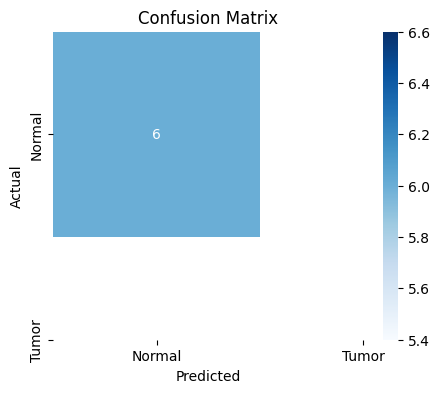

In [19]:
# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal','Tumor'], yticklabels=['Normal','Tumor'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


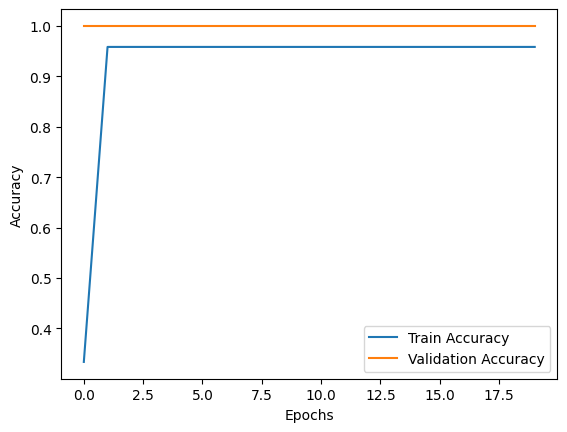

In [22]:
# Step 12: Accuracy and Loss Plots
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

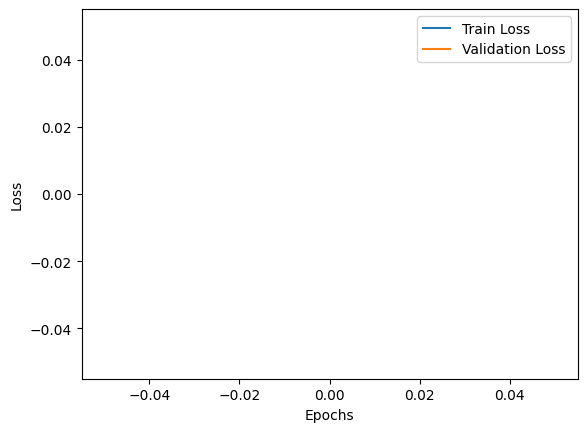

In [21]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()